## Problem Statment
### Prepare a classification model using SVM for salary data

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

from sklearn.metrics import confusion_matrix as cm, accuracy_score as ac, classification_report as report,\
roc_curve, roc_auc_score , recall_score , precision_score, f1_score

from sklearn.model_selection import KFold , GridSearchCV, train_test_split
from sklearn.svm import SVC

In [2]:
df_train=pd.read_csv('SalaryData_Train(1).csv')
df_test=pd.read_csv('SalaryData_Test(1).csv')

In [3]:
df_train.sample(3)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
25846,51,Private,HS-grad,9,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,>50K
4026,48,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,0,20,United-States,>50K
25681,49,Private,7th-8th,4,Never-married,Machine-op-inspct,Not-in-family,Asian-Pac-Islander,Male,0,0,45,Laos,<=50K


In [4]:
df = df_train.append(df_test)
df.reset_index(inplace=True,drop=True)
df

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45216,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
45217,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
45218,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
45219,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


## Data Exploration

In [8]:
df.shape

(45221, 14)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45221 entries, 0 to 45220
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            45221 non-null  int64 
 1   workclass      45221 non-null  object
 2   education      45221 non-null  object
 3   educationno    45221 non-null  int64 
 4   maritalstatus  45221 non-null  object
 5   occupation     45221 non-null  object
 6   relationship   45221 non-null  object
 7   race           45221 non-null  object
 8   sex            45221 non-null  object
 9   capitalgain    45221 non-null  int64 
 10  capitalloss    45221 non-null  int64 
 11  hoursperweek   45221 non-null  int64 
 12  native         45221 non-null  object
 13  Salary         45221 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.8+ MB


In [10]:
df.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,45221.000000,45221.000000,45221.000000,45221.000000,45221.000000
mean,38.548086,10.118463,1101.454700,88.548617,40.938038
std,13.217981,2.552909,7506.511295,404.838249,12.007640
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [5]:
df[df.duplicated()]

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
326,33,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
364,27,Private,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,50,United-States,<=50K
518,24,Private,HS-grad,9,Never-married,Handlers-cleaners,Unmarried,Black,Female,0,0,40,United-States,<=50K
525,24,Private,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
619,33,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45205,22,Private,Some-college,10,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
45210,32,Private,HS-grad,9,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,40,United-States,<=50K
45213,31,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
45214,25,Private,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,40,United-States,<=50K


In [6]:
df.drop_duplicates(inplace=True)
df.reset_index(inplace=True)

In [7]:
df.shape

(39239, 15)

In [8]:
df.corr()

,index,age,educationno,capitalgain,capitalloss,hoursperweek
index,1.000000,0.034566,-0.001737,0.008931,0.012322,0.006788
age,0.034566,1.000000,0.030211,0.075495,0.049876,0.066927
educationno,-0.001737,0.030211,1.000000,0.129552,0.082594,0.136030
capitalgain,0.008931,0.075495,0.129552,1.000000,-0.036791,0.082977
capitalloss,0.012322,0.049876,0.082594,-0.036791,1.000000,0.050638
hoursperweek,0.006788,0.066927,0.136030,0.082977,0.050638,1.000000


## Data Visualization

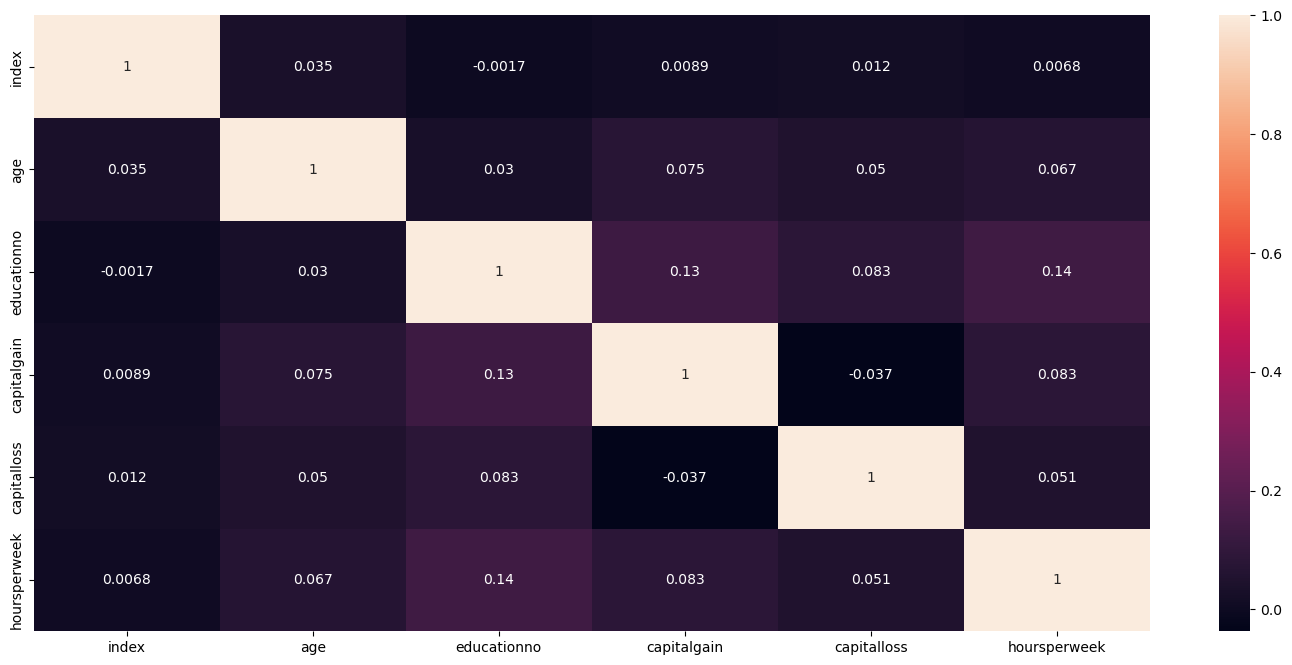

In [15]:
#Heatmap correlation.

fig= plt.figure(figsize=(18, 8))
sns.heatmap(df.corr(), annot=True);
plt.xticks()
plt.show()

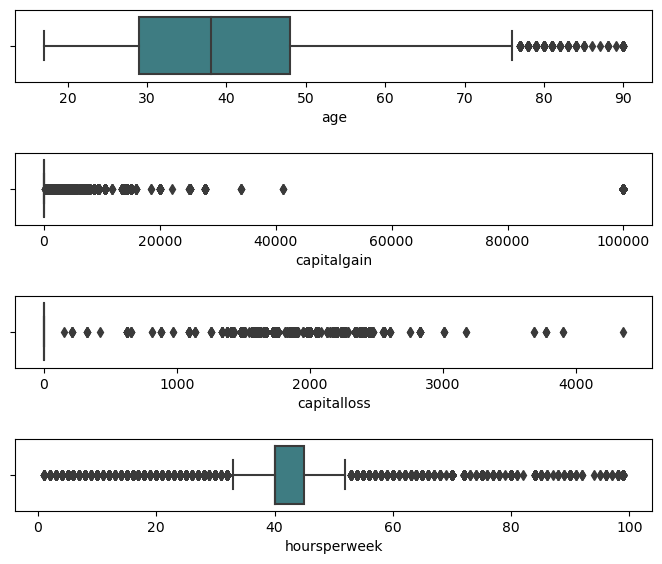

In [16]:
# Plotting box plot to find outliers.

ot=df.copy() 
fig, axes=plt.subplots(4,1,figsize=(7,6),sharex=False,sharey=False)
sns.boxplot(x='age',data=ot,palette='crest',ax=axes[0])
sns.boxplot(x='capitalgain',data=ot,palette='crest',ax=axes[1])
sns.boxplot(x='capitalloss',data=ot,palette='crest',ax=axes[2])
sns.boxplot(x='hoursperweek',data=ot,palette='crest',ax=axes[3])
plt.tight_layout(pad=2.0)

### There are a lot of Outliers, so we cannot remove or treat them at this moment, Lets keep them and use in the further analysis.

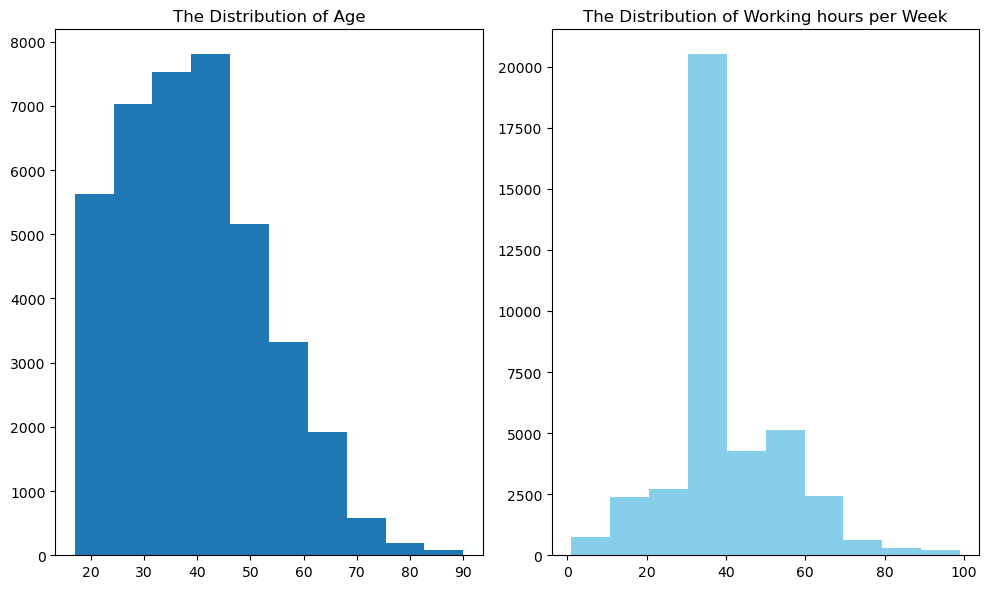

In [17]:
dist_age_balance = plt.figure(figsize = (10,6))

ra1 = dist_age_balance.add_subplot(1,2,1) 
ra2 = dist_age_balance.add_subplot(1,2,2)

ra1.hist(df['age'])
ra1.set_title('The Distribution of Age')

ra2.hist(df['hoursperweek'], color = 'skyblue')
ra2.set_title('The Distribution of Working hours per Week')

plt.tight_layout() 
plt.show()

In [18]:
df[['age','hoursperweek']].describe()

,age,hoursperweek
count,39239.000000,39239.000000
mean,39.309412,41.206121
std,13.298159,12.458178
min,17.000000,1.000000
25%,29.000000,40.000000
50%,38.000000,40.000000
75%,48.000000,45.000000
max,90.000000,99.000000


#### Inference:
+ The distribution of age: In this dataset, we have an extensive age range, from 17 to 90 years old. However, a majority of them are in the age of 20s and 40s (28 to 47 years old fall within the 25th to 75th percentiles). The distribution of customer age is fairly right skewed with a small standard deviation.

+ The distribution of balance: The range of working hours per week is still fairly similar, from a minimum of 1 to a maximum of 100 hours, giving a range of 100 Hours. The distribution of balance is leptokurtica and fairly normally distributed


### Bar Graph for all categorical variables.

Text(0.5, 1.0, 'Working Class')

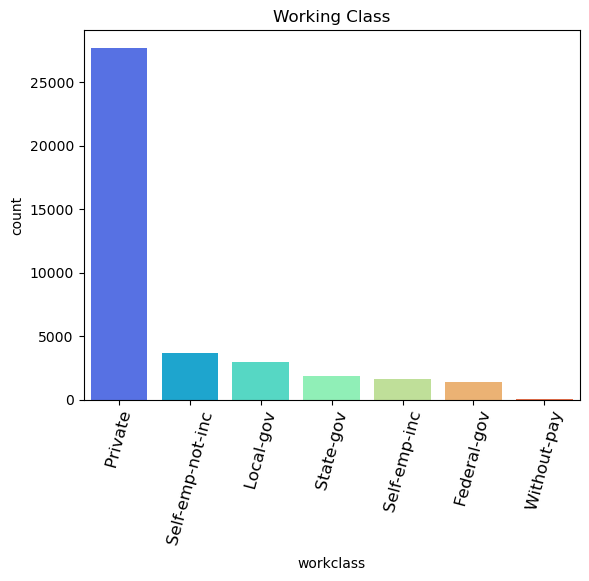

In [19]:
pal = sns.color_palette('rainbow')
sns.countplot(x='workclass', data=df, palette = 'rainbow', 
              order=df['workclass'].value_counts().index, );
plt.xticks(rotation = 75,fontsize = 12)
plt.title('Working Class')

Text(0.5, 1.0, 'Marital Status')

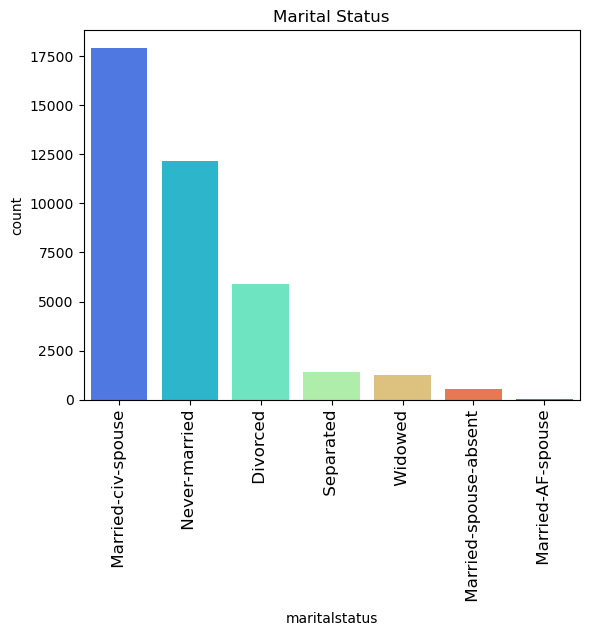

In [20]:
sns.countplot(x='maritalstatus', data=df, palette = pal, 
              order=df['maritalstatus'].value_counts().index)
plt.xticks(fontsize = 12,rotation = 90)
plt.title('Marital Status')

Text(0.5, 1.0, 'Occupation')

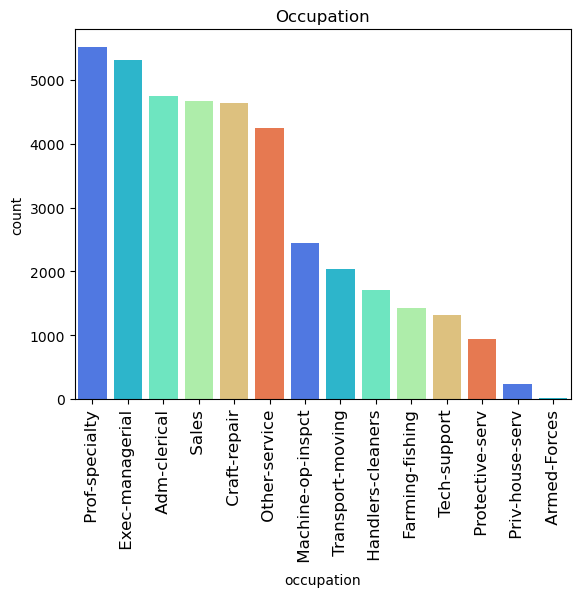

In [21]:
sns.countplot(x='occupation', data=df, palette = pal, 
              order=df['occupation'].value_counts().index)
plt.xticks(fontsize = 12,rotation = 90)
plt.title('Occupation')

Text(0.5, 1.0, 'Relationship')

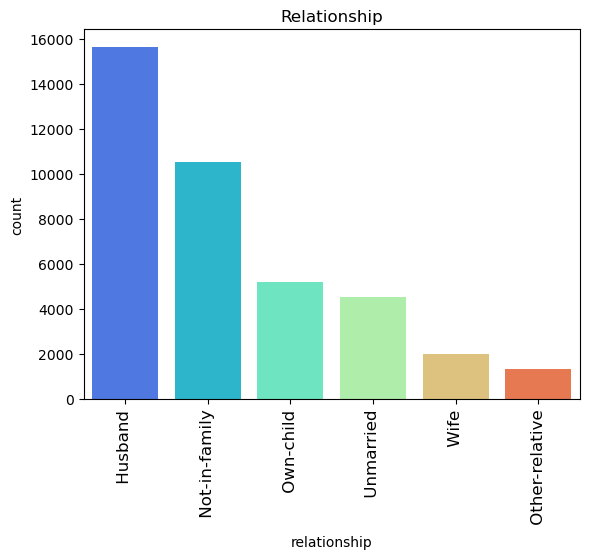

In [32]:
sns.countplot(x='relationship', data=df, palette = pal, 
              order=df['relationship'].value_counts().index)
plt.xticks(fontsize = 12,rotation = 90)
plt.title('Relationship')

Text(0.5, 1.0, 'Gender')

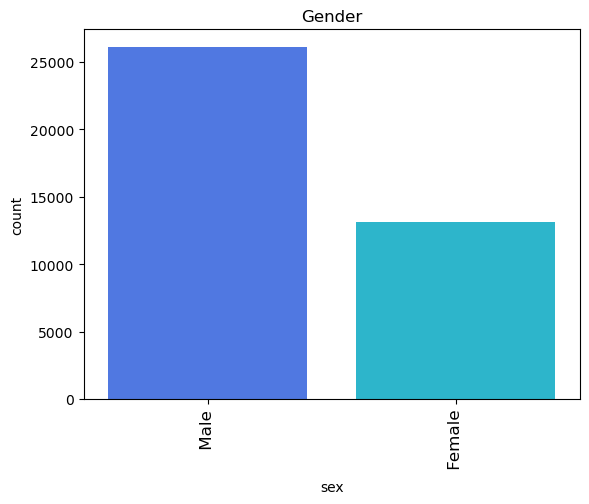

In [33]:
sns.countplot(x='sex', data=df, palette = pal, 
              order=df['sex'].value_counts().index)
plt.xticks(fontsize = 12,rotation = 90)
plt.title('Gender')

Text(0.5, 1.0, 'Race')

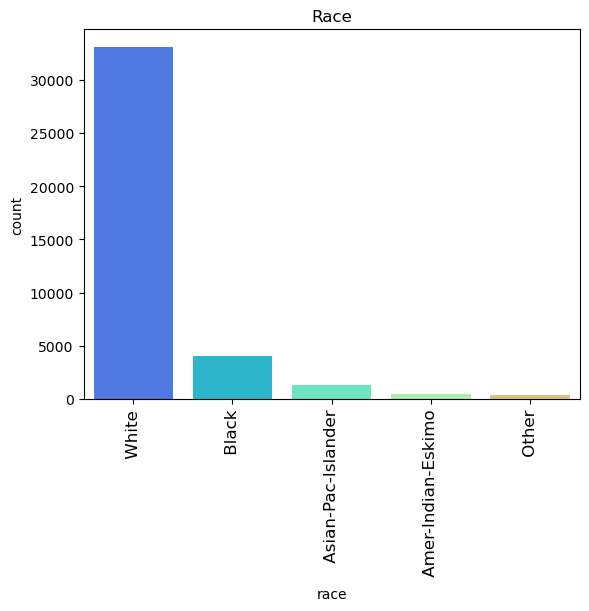

In [34]:
sns.countplot(x='race', data=df, palette = pal, 
              order=df['race'].value_counts().index)
plt.xticks(fontsize = 12,rotation = 90)
plt.title('Race')

### Plotting for Salary Column.

Text(0.5, 1.0, 'Salary')

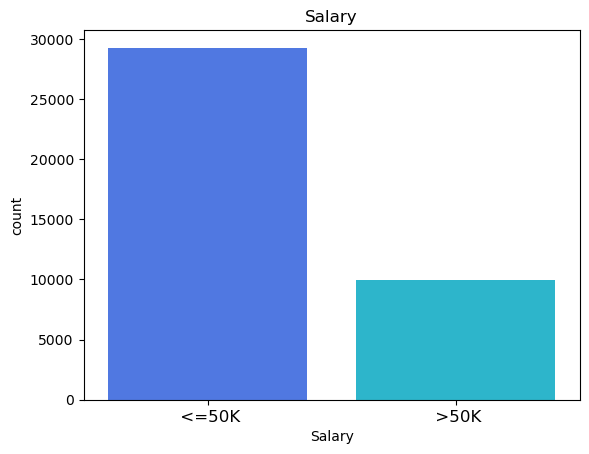

In [35]:
pal = sns.color_palette('rainbow')
sns.countplot(x='Salary', data=df, palette = pal, 
              order=df['Salary'].value_counts().index, );
plt.xticks(fontsize = 12)
plt.title('Salary')

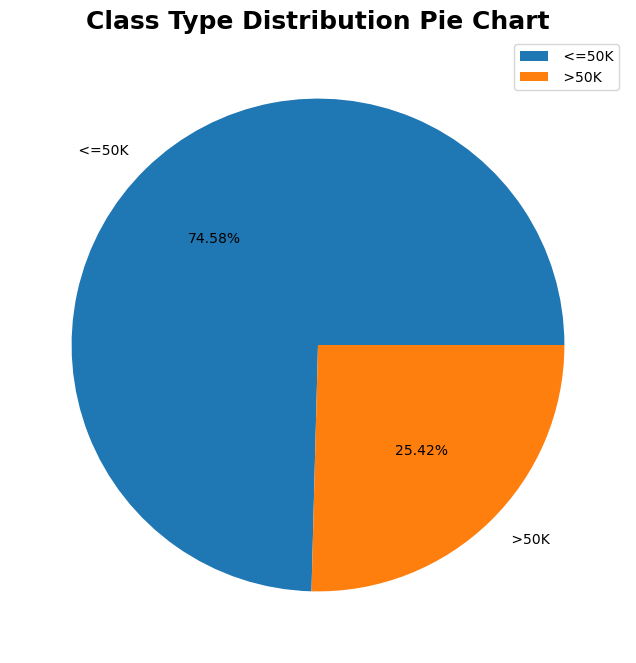

In [39]:
plt.figure(figsize = (12,8))
plt.pie(df['Salary'].value_counts(),
       labels=df.Salary.unique(),autopct= '%.2f%%')
plt.legend(loc= 'best')
plt.title("Class Type Distribution Pie Chart", fontsize = 18, fontweight = 'bold')
plt.show()

### Data Preprocessing

In [7]:
df['Salary'] = np.where(df['Salary'].str.contains(" >50K"), 1, 0)
df.drop('education',axis=1,inplace=True)

In [8]:
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.

label_encoder = preprocessing.LabelEncoder()

df["workclass"]=label_encoder.fit_transform(df["workclass"])
df["maritalstatus"]=label_encoder.fit_transform(df["maritalstatus"])
df["sex"]=label_encoder.fit_transform(df["sex"])
df["race"]=label_encoder.fit_transform(df["race"])
df["occupation"]=label_encoder.fit_transform(df["occupation"])
df["relationship"]=label_encoder.fit_transform(df["relationship"])
df["native"]=label_encoder.fit_transform(df["native"])


In [45]:

df.head(10)

,age,workclass,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,13,4,0,1,4,1,2174,0,40,37,0
1,50,4,13,2,3,0,4,1,0,0,13,37,0
2,38,2,9,0,5,1,4,1,0,0,40,37,0
3,53,2,7,2,5,0,2,1,0,0,40,37,0
4,28,2,13,2,9,5,2,0,0,0,40,4,0
5,37,2,14,2,3,5,4,0,0,0,40,37,0
6,49,2,5,3,7,1,2,0,0,0,16,21,0
7,52,4,9,2,3,0,4,1,0,0,45,37,1
8,31,2,14,4,9,1,4,0,14084,0,50,37,1
9,42,2,13,2,3,0,4,1,5178,0,40,37,1


In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features = df[['age','capitalgain','capitalloss','hoursperweek']]
df[['age','capitalgain','capitalloss','hoursperweek']] = scaler.fit_transform(features.values)
df.head()

,index,age,workclass,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,0,-0.023268,5,13,4,0,1,4,1,0.115168,-0.234655,-0.096815,37,0
1,1,0.803925,4,13,2,3,0,4,1,-0.156786,-0.234655,-2.264094,37,0
2,2,-0.098467,2,9,0,5,1,4,1,-0.156786,-0.234655,-0.096815,37,0
3,3,1.029523,2,7,2,5,0,2,1,-0.156786,-0.234655,-0.096815,37,0
4,4,-0.850460,2,13,2,9,5,2,0,-0.156786,-0.234655,-0.096815,4,0


In [10]:
df.drop(columns=['index'],inplace=True)

In [11]:
X= df.iloc[:,:-1]
y = df.iloc[:,-1]

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=3,stratify=y)

## SVC Model Building
### Build the model with default hyper parameters.

In [13]:
clf = SVC()

In [14]:
import time




clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)



In [15]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test,y_pred))

0.8061926605504587


In [16]:
from sklearn.model_selection import cross_val_score
start_time = time.time()
cv_scores = cross_val_score(clf, X, y, cv=4)

print("Cross-validation scores:", cv_scores)
print("Mean CV score:", np.mean(cv_scores))
end_time = time.time()
elapsed_time = end_time - start_time
print(elapsed_time)

Cross-validation scores: [0.80285423 0.80326198 0.81416922 0.80895096]
Mean CV score: 0.8073090966096688
110.9450135231018


### The model is giving 80.73% accuracy after cross validation, the Accuracy can be increased by tuning the hyper parameters.

### Creating a dict to hold the different combinations of hyperparameters.

In [22]:
model_params = {
        'kernel':['linear'],
        'kernel':['rbf'], 'gamma':[0.1, 0.8],
        'kernel':['poly'], 'degree': [2,3] ,'gamma':[0.01,0.05] 
                }

In [23]:
grid_search = GridSearchCV(clf, model_params, cv=3, scoring='accuracy',n_jobs=-1)

In [ ]:
grid_search.fit(X_train, y_train)

In [19]:
# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'gamma': 0.1, 'kernel': 'rbf'}


In [20]:
# Get the best model
best_model = grid_search.best_estimator_

In [21]:
# Evaluate the best model on the test set
accuracy1 = best_model.score(X_test, y_test)
#accuracy2 = best_model.score(X_train, y_train)

#print("Train Accuracy with Best Model:", accuracy2)
print("Test Accuracy with Best Model:", accuracy1)

Test Accuracy with Best Model: 0.7457951070336392


In [17]:
# print the scores on training and test set, basically to check overfitting.

print('Training set score: {:.2f}%'.format(clf.score(X_train, y_train)*100))

print('Test set score: {:.2f}%'.format(clf.score(X_test, y_test)*100))

Training set score: 80.84%
Test set score: 80.62%


### The SVC model is taking more a few hours to build a single model, as the dataset has 40k rows, lets go ahead with default model and evaulate the same.

### The accuracy is coming out to be 80%.

## Model Evaluation.

In [18]:
print('SVC Base Model','\n',report(y_test, y_pred))

SVC Base Model 
               precision    recall  f1-score   support

           0       0.80      0.98      0.88      5853
           1       0.83      0.30      0.44      1995

    accuracy                           0.81      7848
   macro avg       0.82      0.64      0.66      7848
weighted avg       0.81      0.81      0.77      7848



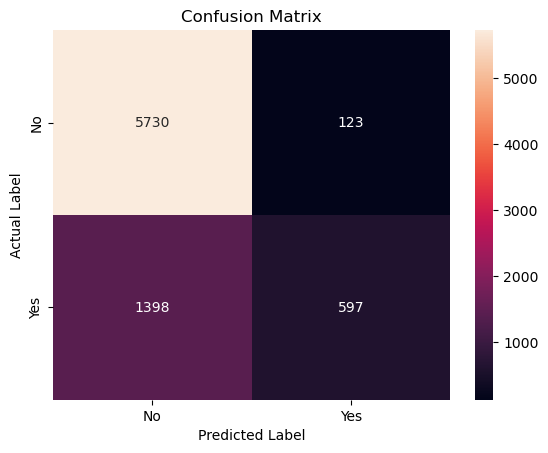

In [19]:
# plot confusion matrix to describe the performance of classifier.

cm_df=cm(y_test, y_pred)
class_label = ["No", "Yes"]
df_cm = pd.DataFrame(cm_df, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

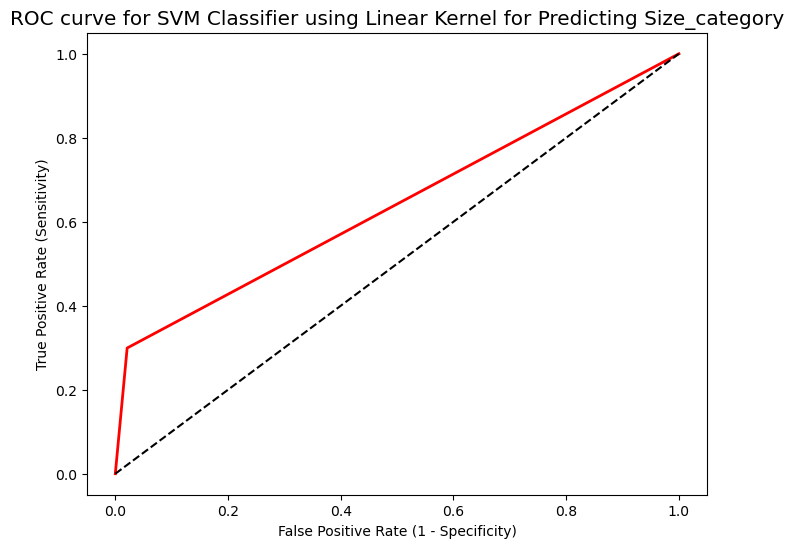

ROC AUC : 0.6391


In [20]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

plt.figure(figsize=(8,6))

plt.plot(fpr, tpr, linewidth=2, color='red')

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for SVM Classifier using Linear Kernel for Predicting Size_category')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

ROC_AUC = roc_auc_score(y_test, y_pred)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

### The AUC is not good, This can be due to the data is imbalanced, we can further try to improve the AUC by upsampling(SMOTE- Synthetic Minority Oversampling Technique).

### Pros
* Effective on datasets with multiple features, like financial or medical data.
* It is really effective in the higher dimension.
* Effective when the number of features are more than training examples
* The hyperplane is affected by only the support vectors thus outliers have less impact. 
* It performs well for relatively small datasets

### Cons
* If the number of features is a lot bigger than the number of data points, avoiding over-fitting when choosing kernel functions and regularization term is crucial. 
* For larger dataset, it requires a large amount of time to process.
* Works best only on small sample sets because of its high training time
- Selecting, appropriately hyperparameters of the SVM that will allow for sufficient generalization performance.
- Selecting the appropriate kernel function can be tricky.